Linear Regression MSE (Player Value): 3.9683996656124902, R2: 0.31092994064560575
Ridge MSE (Player Value): 3.968407156832237, R2: 0.31092863987560515
Lasso MSE (Player Value): 5.674788865867636, R2: 0.014633749087482717
XGBoost MSE (Player Value): 0.23656551569248238, R2: 0.9589229342618991
Random Forest MSE (Player Value): 0.23951122731774036, R2: 0.9584114430171925
KNN MSE (Player Value): 2.3065181687195335, R2: 0.5994978466524354
Best model: XGBoost with MSE: 0.23656551569248238 and R2: 0.9589229342618991


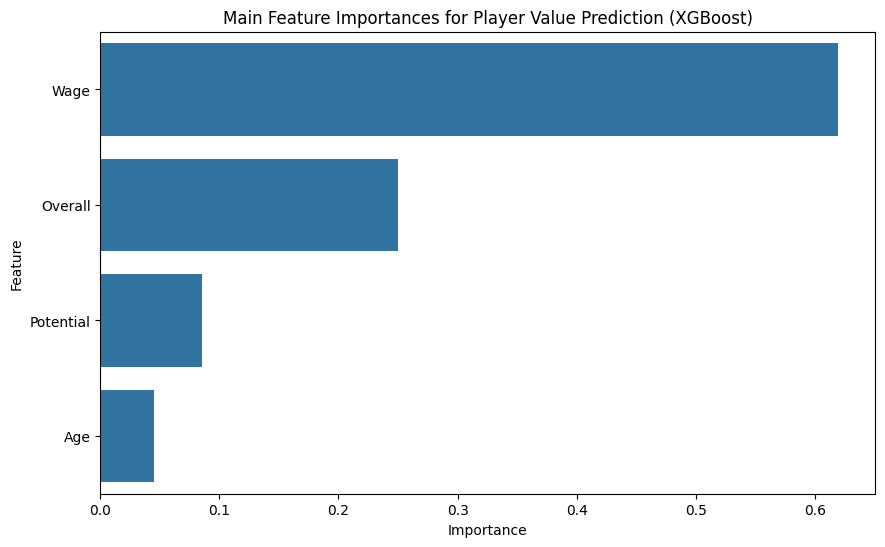

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Load the cleaned data
df = pd.read_csv('../Dataset/Cleaned/combinedCleanedData_20240709_145255.csv')

# Log transformation for Player Value
df['Log_Value'] = np.log1p(df['Value'])

# Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# Create a pipeline
def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

# Player Value Prediction
features_player_value = ['Age', 'Overall', 'Potential', 'Wage']
X_player_value = df[features_player_value]
y_player_value = df['Log_Value']

X_train_player, X_test_player, y_train_player, y_test_player = train_test_split(X_player_value, y_player_value, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'XGBoost': XGBRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'KNN': KNeighborsRegressor()
}

# Evaluate models
results = {}
for name, model in models.items():
    pipeline = create_pipeline(model)
    mse, r2 = evaluate_model(pipeline, X_train_player, y_train_player, X_test_player, y_test_player)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} MSE (Player Value): {mse}, R2: {r2}")

# Identify the best model
best_model_name = min(results, key=lambda k: results[k]['MSE'])
print(f"Best model: {best_model_name} with MSE: {results[best_model_name]['MSE']} and R2: {results[best_model_name]['R2']}")

# Feature Importance for the best model
best_model = create_pipeline(models[best_model_name])
best_model.fit(X_train_player, y_train_player)
if best_model_name == 'XGBoost' or best_model_name == 'Random Forest':
    importances = best_model.named_steps['model'].feature_importances_
    feature_names = X_player_value.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
    plt.title(f'Main Feature Importances for Player Value Prediction ({best_model_name})')
    plt.show()
else:
    print(f"Feature importance is not available for {best_model_name}")


Here is an explanation of the results for the player value prediction models:

Linear Regression:

MSE: 3.9684
R2: 0.3109
This model has a moderate MSE and an R2 indicating that about 31% of the variance in the log-transformed player value can be explained by the model.
Ridge Regression:

MSE: 3.9684
R2: 0.3109
Similar performance to linear regression, showing little improvement in handling multicollinearity.
Lasso Regression:

MSE: 5.6748
R2: 0.0146
This model performed worse with a higher MSE and a low R2, indicating it explains only about 1.5% of the variance.
XGBoost:

MSE: 0.2366
R2: 0.9589
This model performed the best with the lowest MSE and the highest R2, indicating it explains about 96% of the variance in the player value.
Random Forest:

MSE: 0.2395
R2: 0.9584
Also performed very well, close to XGBoost, with a high R2 indicating it explains about 95.8% of the variance.
K-Nearest Neighbors (KNN):

MSE: 2.3065
R2: 0.5995
This model performed moderately well, with a decent MSE and an R2 indicating it explains about 60% of the variance.
Summary
The XGBoost model was identified as the best-performing model with the lowest Mean Squared Error (MSE) and the highest R2 score, indicating that it can explain about 96% of the variance in the player value. This demonstrates its strong predictive power and accuracy compared to the other models.

The importance of features in the XGBoost model would be plotted to understand which features contribute the most to the predictions, giving insights into the factors that most influence player value.






